Matplotlib Advanced Customization

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_DA['job_posted_month'] = pd.Categorical(
    df_DA['job_posted_date'].dt.strftime('%b'),
    categories=month_order,
    ordered=True
)

df_DA['job_posted_month']

1         Jan
12        Dec
18        Oct
31        Oct
34        Feb
         ... 
785703    Jan
785705    Jan
785715    Mar
785717    Mar
785737    Mar
Name: job_posted_month, Length: 196075, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [3]:
df_DA_exploded = df_DA.explode('job_skills').copy()

In [4]:
df_DA_pivot = df_DA_exploded.pivot_table(
    index='job_posted_month', 
    columns='job_skills', 
    aggfunc='size', 
    fill_value=0, 
    observed=False
    ).copy()
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [5]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [6]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index].copy()
df_DA_pivot.drop(labels='Total', inplace=True)
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


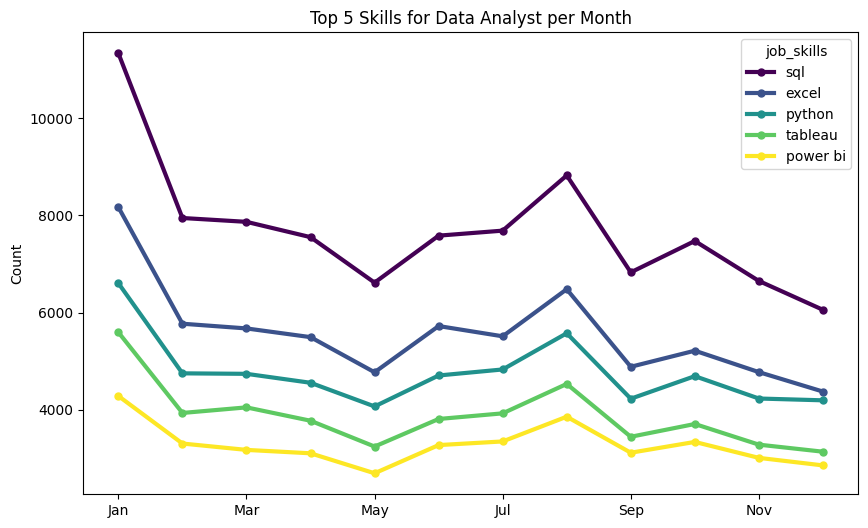

In [7]:
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth=3,
    linestyle='-', # options: '-', '--'. '-.', ':'
    colormap='viridis', # options: viridis, plasma, inferno, magma, cividis
    marker='o',
    markersize=5,
    figsize=(10, 6)
)

plt.title('Top 5 Skills for Data Analyst per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [8]:
df_scatterp = df[df['job_title_short'] == 'Data Analyst'].copy()
df_scatterp_exploded = df_scatterp.explode('job_skills').copy()

skill_stats = df_scatterp_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
    ).copy()

skills_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skills_count)

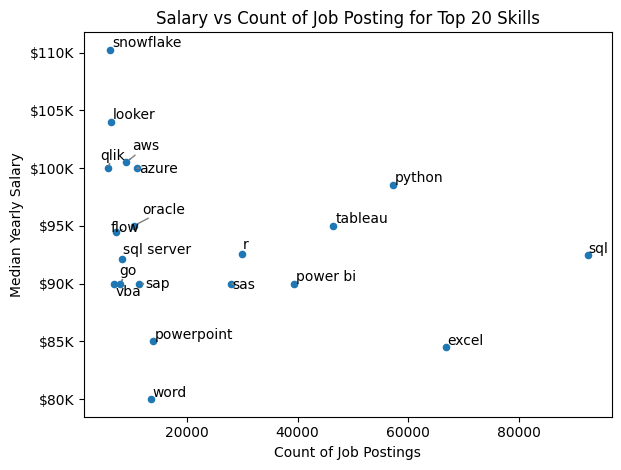

In [9]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title(f"Salary vs Count of Job Posting for Top {skills_count} Skills")
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()

texts = []

for i, x in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], x))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.show()